# Validation of swaps

In [1]:
import numpy as np
import numpy.matlib as npm
import json
import matplotlib.pyplot as plt
from matplotlib import rc
import copy
import warnings
import scipy
from scipy import sparse
from tqdm.notebook import tqdm
import importlib as imp
import random

import main_cd as main
import main_cd_plots as pltm

---

# SWAP operation

In this test, we check that swaps fail with probability $p_\mathrm{s}$.

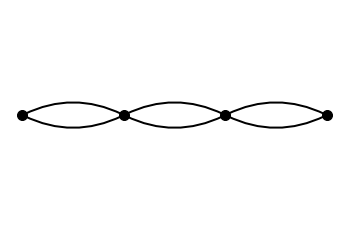

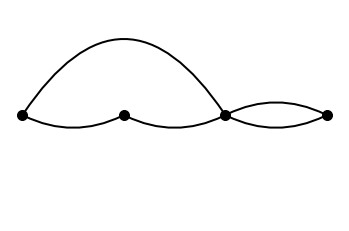

In [79]:
# Inputs
n = 4
p = 1
ps = 1
r = 2

# Swap
qubit_id1 = [1,0,0]
#qubit_id2 = [2,1,0] # Error: different nodes
#qubit_id2 = [1,0,0] # Error: same physical channel
#qubit_id2 = [1,1,0] # Error: no physical channel
qubit_id2 = [1,2,0]

# Topology
A = main.adjacency_chain(n)
layout = 'chain'

# Numerical
randomseed = 2


### SMALL TEST ###
np.random.seed(randomseed)
imp.reload(main)
imp.reload(pltm)

registers = main.create_qubit_registers(A, r)

# Generate as many entangled links as possible
for _ in range(r):
    registers = main.generate_all_links(registers, p)
pltm.plot_entangled_links(registers, layout=layout)
registers = main.swap(registers, qubit_id1, qubit_id2, ps)
pltm.plot_entangled_links(registers, layout=layout)

In [77]:
# Inputs
n = 4
p = 1
r = 2
ps = 0.79

# Topology
A = main.adjacency_chain(n)
layout = 'chain'

# Swap
qubit_id1 = [1,0,0]
qubit_id2 = [1,2,0]

# Numerical
randomseed = 2
N_samples = 10000


### SMALL TEST ###
np.random.seed(randomseed)
imp.reload(main)
imp.reload(pltm)

swaps_success = []
total_links = (n-1)*r
for _ in range(N_samples):
    registers = main.create_qubit_registers(A, r)
    # Generate as many entangled links as possible
    for _ in range(r):
        registers = main.generate_all_links(registers, p)
    registers = main.swap(registers, qubit_id1, qubit_id2, ps)
    registers = main.cutoffs(registers, 100)
    links_after_swap = main.total_qubits_occupied(registers)/2
    if links_after_swap<total_links-1:
        swaps_success += [0]
    else:
        swaps_success += [1]

print('Prob. successful swap (theory): %.3f'%ps)
# Print 95% interval of confidence
avg_success = np.mean(swaps_success)
stderr_success = np.std(swaps_success)/(N_samples**0.5)
print('Rate successful swaps (experiment): %.3f (%.3f)'%(avg_success, 2*stderr_success))

Prob. successful swap (theory): 0.790
Rate successful swaps (experiment): 0.796 (0.008)


---

# Several SWAPs in a row

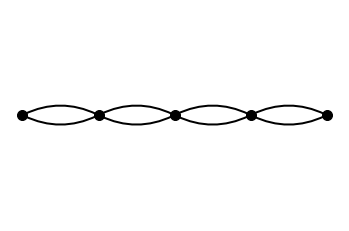

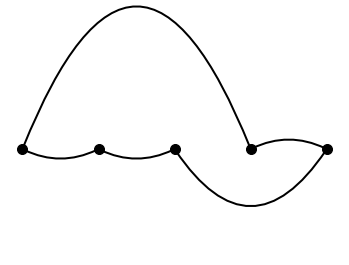

In [164]:
# Inputs
n = 5
p = 1
ps = 1
r = 2

# Swap 1
qubit_id1 = [1,0,0]
qubit_id2 = [1,2,0]

# Swap 2
qubit_id3 = [2,1,0]
qubit_id4 = [2,3,0]

# Swap 3
qubit_id5 = [3,2,1]
qubit_id6 = [3,4,1]

# Topology
A = main.adjacency_chain(n)
layout = 'chain'

# Numerical
randomseed = 2


### SMALL TEST ###
np.random.seed(randomseed)
imp.reload(main)
imp.reload(pltm)

registers = main.create_qubit_registers(A, r)

# Generate as many entangled links as possible
for _ in range(r):
    registers = main.generate_all_links(registers, p)
pltm.plot_entangled_links(registers, layout=layout)
registers = main.swap(registers, qubit_id1, qubit_id2, ps)
registers = main.swap(registers, qubit_id3, qubit_id4, ps)
registers = main.swap(registers, qubit_id5, qubit_id6, ps)
pltm.plot_entangled_links(registers, layout=layout)

In [170]:
# Inputs
n = 4
p = 1
r = 2
ps = 0.84

# Topology
A = main.adjacency_chain(n)
layout = 'chain'

# Swap 1
qubit_id1 = [1,0,0]
qubit_id2 = [1,2,0]

# Swap 2
qubit_id3 = [2,1,0]
qubit_id4 = [2,3,0]

# Numerical
randomseed = 2
N_samples = 10000


### SMALL TEST ###
np.random.seed(randomseed)
imp.reload(main)
imp.reload(pltm)

all_swaps_success = []
for _ in range(N_samples):
    registers = main.create_qubit_registers(A, r)
    # Generate as many entangled links as possible
    for _ in range(r):
        registers = main.generate_all_links(registers, p)
    registers = main.swap(registers, qubit_id1, qubit_id2, ps)
    registers = main.swap(registers, qubit_id3, qubit_id4, ps)
    registers = main.cutoffs(registers, 100)
    links_after_swap = main.total_qubits_occupied(registers)/2
    if links_after_swap == 4:
        all_swaps_success += [1]
    else:
        all_swaps_success += [0]

print('Prob. all swaps successful (theory): %.3f'%(ps**2))
# Print 95% interval of confidence
avg_success = np.mean(all_swaps_success)
stderr_success = np.std(all_swaps_success)/(N_samples**0.5)
print('Rate successful swaps (experiment): %.3f (%.3f)'%(avg_success, 2*stderr_success))

Prob. all swaps successful (theory): 0.706
Rate successful swaps (experiment): 0.700 (0.009)
